In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
BATCH_SIZE = 64
transform = transforms.Compose([transforms.ToTensor()])

In [7]:
train_set = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

test_set = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

In [38]:
train_set = torchvision.datasets.PCAM(
    root="./data", split="train", download=True, transform=transform
)

test_set = torchvision.datasets.PCAM(
    root="./data", split="test", download=True, transform=transform
)

In [41]:
train_loader = torch.utils.data.DataLoader(
    test_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=0
)

test_loader = torch.utils.data.DataLoader(
    train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=0
)

Image batch dimensions: torch.Size([64, 1, 28, 28])
Image label dimensions: torch.Size([64])


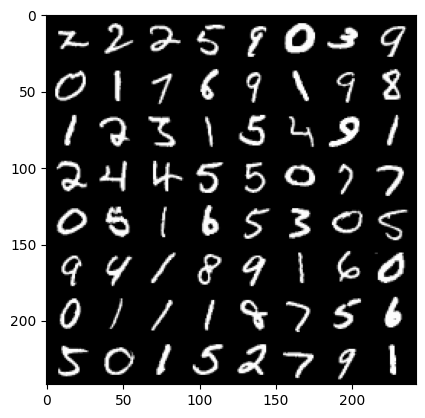

In [9]:
def imshow(img):
    img_np = img.numpy()
    plt.imshow(np.transpose(img_np, (1, 2, 0)))


for images, labels in train_loader:
    imshow(torchvision.utils.make_grid(images))
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

In [10]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.flatten = nn.Flatten()
        self.activation = nn.ReLU()
        self.activation_soft_max = nn.Softmax(dim=1)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.activation(self.conv1(x))
        # flatten => 32 x (32*26*26)
        x = self.flatten(x)
        # 32 x (32*26*26) => 32x128
        x = self.activation(self.d1(x))
        # logits => 32x10
        x = self.activation_soft_max(self.d2(x))
        return x

In [16]:
def get_accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size
    return accuracy.item()

def get_model_accuracy(_net):
    test_acc = 0.0
    with torch.no_grad():
        for (images, labels) in test_loader:
            outputs = _net(images)
            test_acc += get_accuracy(outputs, labels, BATCH_SIZE)   
    print("Test accuracy: %.2f" % (test_acc / len(test_loader)))

In [13]:
def train_model(_criterion, _optimizer, _net, _epoch_num):
    epoch_loss: list[float] = []
    epoch_accuracy: list[float] = []
    for epoch in range(_epoch_num):
        running_loss = 0.0
        accuracy = 0.0
        for data in train_loader:

            inputs, labels = data

            _optimizer.zero_grad()

            outputs = _net(inputs)
            loss = _criterion(outputs, labels)
            loss.backward()
            _optimizer.step()
            running_loss += loss.item()
            accuracy += get_accuracy(outputs, labels, BATCH_SIZE)
        epoch_loss_temp = running_loss / len(train_loader)
        epoch_accuracy_temp = accuracy / len(train_loader)

        epoch_loss.append(epoch_loss_temp)
        epoch_accuracy.append(epoch_accuracy_temp)
        print(
            "Epoch: %d | Loss: %.4f | Train Accuracy: %.2f "
            % (epoch, epoch_loss_temp, epoch_accuracy_temp)
        )

    return epoch_loss, epoch_accuracy

In [25]:
default_digit_net = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(default_digit_net.parameters(), lr=0.001)

loss, accuracy = train_model(criterion, optimizer, default_digit_net, 4)

Epoch: 0 | Loss: 1.7542 | Train Accuracy: 71.89 
Epoch: 1 | Loss: 1.6035 | Train Accuracy: 85.93 
Epoch: 2 | Loss: 1.5204 | Train Accuracy: 94.03 
Epoch: 3 | Loss: 1.5025 | Train Accuracy: 95.91 


In [26]:
get_model_accuracy(default_digit_net)

Test accuracy: 94.67


In [34]:
another_digit_net = DigitClassifier()
another_criterion = nn.CrossEntropyLoss()
another_optimizer = torch.optim.Adam(another_digit_net.parameters(), lr=0.001)

another_loss, another_accuracy = train_model(
    another_criterion, another_optimizer, another_digit_net, 20
)

Epoch: 0 | Loss: 1.6724 | Train Accuracy: 80.13 
Epoch: 1 | Loss: 1.5332 | Train Accuracy: 92.97 
Epoch: 2 | Loss: 1.5141 | Train Accuracy: 94.72 
Epoch: 3 | Loss: 1.5016 | Train Accuracy: 95.88 
Epoch: 4 | Loss: 1.4893 | Train Accuracy: 97.08 
Epoch: 5 | Loss: 1.4831 | Train Accuracy: 97.68 
Epoch: 6 | Loss: 1.4797 | Train Accuracy: 97.96 
Epoch: 7 | Loss: 1.4758 | Train Accuracy: 98.30 
Epoch: 8 | Loss: 1.4729 | Train Accuracy: 98.55 
Epoch: 9 | Loss: 1.4711 | Train Accuracy: 98.65 
Epoch: 10 | Loss: 1.4700 | Train Accuracy: 98.76 
Epoch: 11 | Loss: 1.4684 | Train Accuracy: 98.84 
Epoch: 12 | Loss: 1.4685 | Train Accuracy: 98.84 
Epoch: 13 | Loss: 1.4679 | Train Accuracy: 98.88 
Epoch: 14 | Loss: 1.4683 | Train Accuracy: 98.88 
Epoch: 15 | Loss: 1.4678 | Train Accuracy: 98.92 
Epoch: 16 | Loss: 1.4671 | Train Accuracy: 98.98 
Epoch: 17 | Loss: 1.4664 | Train Accuracy: 99.02 
Epoch: 18 | Loss: 1.4662 | Train Accuracy: 99.02 
Epoch: 19 | Loss: 1.4660 | Train Accuracy: 99.05 


In [36]:
get_model_accuracy(another_digit_net)

Test accuracy: 96.11


Image batch dimensions: torch.Size([64, 3, 96, 96])
Image label dimensions: torch.Size([64])


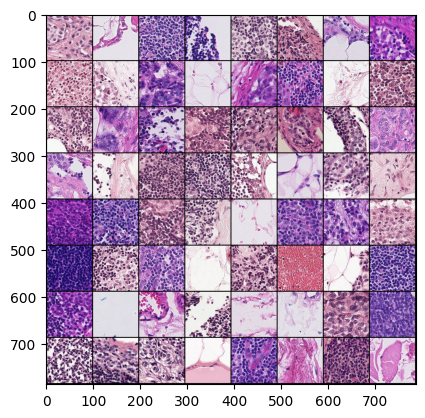

In [42]:
for images, labels in train_loader:
    imshow(torchvision.utils.make_grid(images))
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

In [45]:
class LymphNodesClassifier(nn.Module):
    def __init__(self):
        super(LymphNodesClassifier, self).__init__()
        # 96x96x3 => 94x94x32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.flatten = nn.Flatten()
        self.activation = nn.ReLU()
        self.activation_soft_max = nn.Softmax(dim=1)
        self.d1 = nn.Linear(94 * 94 * 32, 256)
        self.d2 = nn.Linear(256, 2)

    def forward(self, x):
        # 32x3x96x96 => 32x32x94x94
        x = self.activation(self.conv1(x))
        # flatten => 32 x (32*94*94)
        x = self.flatten(x)
        # 32 x (32*94*94) => 32x256
        x = self.activation(self.d1(x))
        # logits => 32x2
        x = self.activation_soft_max(self.d2(x))
        return x

In [48]:
lymph_nodes_net = LymphNodesClassifier()
criterion_lymph = nn.CrossEntropyLoss()
optimizer_lymph = torch.optim.SGD(lymph_nodes_net.parameters(), lr=0.001)

loss_lymph, accuracy_lymph = train_model(criterion_lymph, optimizer_lymph, lymph_nodes_net, 20)

Epoch: 0 | Loss: 0.6468 | Train Accuracy: 61.99 
Epoch: 1 | Loss: 0.6234 | Train Accuracy: 65.01 
Epoch: 2 | Loss: 0.6091 | Train Accuracy: 68.54 
Epoch: 3 | Loss: 0.5956 | Train Accuracy: 71.70 
Epoch: 4 | Loss: 0.5823 | Train Accuracy: 73.01 
Epoch: 5 | Loss: 0.5724 | Train Accuracy: 73.96 
Epoch: 6 | Loss: 0.5644 | Train Accuracy: 74.66 
Epoch: 7 | Loss: 0.5588 | Train Accuracy: 75.17 
Epoch: 8 | Loss: 0.5527 | Train Accuracy: 75.64 
Epoch: 9 | Loss: 0.5480 | Train Accuracy: 76.10 
Epoch: 10 | Loss: 0.5438 | Train Accuracy: 76.40 
Epoch: 11 | Loss: 0.5407 | Train Accuracy: 77.03 
Epoch: 12 | Loss: 0.5379 | Train Accuracy: 77.17 
Epoch: 13 | Loss: 0.5349 | Train Accuracy: 77.47 
Epoch: 14 | Loss: 0.5321 | Train Accuracy: 77.59 
Epoch: 15 | Loss: 0.5297 | Train Accuracy: 77.97 
Epoch: 16 | Loss: 0.5274 | Train Accuracy: 78.12 
Epoch: 17 | Loss: 0.5266 | Train Accuracy: 78.16 
Epoch: 18 | Loss: 0.5242 | Train Accuracy: 78.41 
Epoch: 19 | Loss: 0.5225 | Train Accuracy: 78.55 


In [51]:
get_model_accuracy(lymph_nodes_net)

Test accuracy: 74.99


In [54]:
pretrained_resnet = torchvision.models.resnet50(pretrained=True)

# Заморозка параметров нижних слоев
for param in pretrained_resnet.parameters():
    param.requires_grad = False

# Изменение архитектуры верхних слоев
pretrained_resnet.fc = nn.Sequential(
    nn.Linear(pretrained_resnet.fc.in_features, 96),
    nn.ReLU(),
    nn.Linear(96, 2),
)

criterion_pretrained_resnet = nn.CrossEntropyLoss()
optimizer_pretrained_resnet = torch.optim.Adam(pretrained_resnet.parameters(), lr=0.01)

loss_pretrained_resnet, accuracy_pretrained_resnet = train_model(
    criterion_pretrained_resnet, optimizer_pretrained_resnet, pretrained_resnet, 4
)

Epoch: 0 | Loss: 0.4507 | Train Accuracy: 80.91 
Epoch: 1 | Loss: 0.3633 | Train Accuracy: 83.66 
Epoch: 2 | Loss: 0.3499 | Train Accuracy: 84.16 
Epoch: 3 | Loss: 0.3352 | Train Accuracy: 84.88 


In [55]:
get_model_accuracy(pretrained_resnet)

Test accuracy: 64.23
